In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import warnings
import nltk
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
train_data =pd.read_parquet('train-00000-of-00001.parquet')
test_data =pd.read_parquet('test-00000-of-00001.parquet')


In [3]:
test_data.head(10)
train_data.head(10)

,date,id,username,text,party,labels
0,2021-10-13 19:47:44,1448374915636383745,SenatorHassan,Happy th birthday to the @USNavy! The strength...,Democrat,1
1,2021-06-30 14:53:13,1410250073003462656,SenatorMenendez,The greatest generation's investment in infras...,Democrat,1
2,2021-08-08 01:11:29,1424176405881966599,SenBillCassidy,"Thanks to @SenTedCruz and @SenatorWarnock, th...",Republican,0
3,2021-04-14 14:02:49,1382333523567185921,SenBlumenthal,/ To get lasting change we cant just lock up t...,Democrat,1
4,2021-12-11 16:06:38,1469700160934621188,SenatorBraun,Today were celebrating years of the Hoosier st...,Republican,0
5,2021-05-11 17:18:50,1392167324401143812,SenJeffMerkley,The #ForthePeopleAct includes reforms that are...,Democrat,1
6,2021-08-10 16:22:55,1425130548620578816,SenBlumenthal,"Todays strong, bipartisan vote is just the beg...",Democrat,1
7,2021-08-12 01:13:26,1425626448518385664,SenatorHagerty,Supporting crime victims requires holding crim...,Republican,0
8,2021-12-11 16:27:51,1469705498224209928,SenBillCassidy,We in Louisiana know how natural disasters cha...,Republican,0
9,2021-01-20 13:55:04,1351890994220957698,CoryBooker,Today we start anew.,Democrat,1


In [4]:
test_data.columns
train_data.columns



Index(['date', 'id', 'username', 'text', 'party', 'labels'], dtype='object')

In [5]:
test_data["text"]
train_data["text"]

0        Happy th birthday to the @USNavy! The strength...
1        The greatest generation's investment in infras...
2        Thanks to @SenTedCruz and  @SenatorWarnock, th...
3        / To get lasting change we cant just lock up t...
4        Today were celebrating years of the Hoosier st...
                               ...                        
79749    You spelled "voter suppression" wrong. https:/...
79750    .@VP: This is no laughing matter. Your policie...
79751    In the wake of last weeks attack, we are etern...
79752    This is the right thing to do. There needs to ...
79753    Building on the Trump Admins Jan '21 determina...
Name: text, Length: 79754, dtype: object

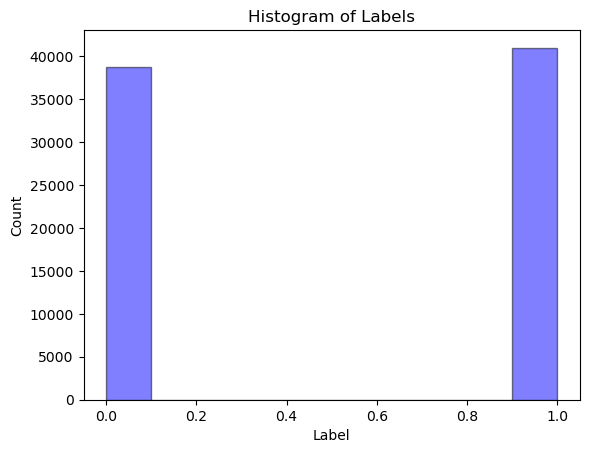

In [6]:
#checking for balance in the train data
plt.hist(train_data["labels"], bins=10, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [7]:
#check for null values
train_data.isnull().sum()
test_data.isnull().sum()


date        0
id          0
username    0
text        0
party       0
labels      0
dtype: int64

In [8]:


def clean_data(tweets_df, remove_stopwords=False):
    """Clean the data by removing URLs, converting to lowercase and removing @s and #s from the tweet"""

    warnings.filterwarnings("ignore")

    #replace nan with empty string
    tweets_df["text"] = tweets_df["text"].fillna('')

    # remove all URLs from the text
    tweets_df["text"] = tweets_df["text"].str.replace(r"http\S+", "")
    tweets_df["text"] = tweets_df["text"].str.replace(r"www.\S+", "")

    # remove all mentions from the text 
    tweets_df["text"] = tweets_df["text"].str.replace(r"@\S+", "") 

    # remove all hashtags from the text
    tweets_df["text"] = tweets_df["text"].str.replace(r"#", "")

    # lowercase all text
    tweets_df["text"] = tweets_df["text"].str.lower()

    # #remove punctuations
    
    # tweets_df["text"] = re.sub('[()!?]', ' ', tweets_df["text"])
    # tweets_df["text"] = re.sub('\[.*?\]',' ', tweets_df["text"])
    
    # #filtering non alphanumeric characters
    # tweets_df["text"] = re.sub("[^a-z0-9]"," ", tweets_df["text"])
    

    #remove html tags

    #remove 
    string1 = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    def remove_punt(text):
        text = "".join([char for char in text if char not in string1])
        text = re.sub('[0-9]+', '', text)
        return text
    

    tweets_df["text"] = tweets_df["text"].apply(lambda x: remove_punt(x))
    


    if remove_stopwords:
        # remove stopwords
        nltk.download("stopwords")
        stop_words = set(stopwords.words("english"))
        tweets_df["text"] = tweets_df["text"].apply(
            lambda x: " ".join([word for word in x.split() if word not in stop_words])
        )

    tweets_df["text"] = tweets_df["text"].str.split()


   


    
    return tweets_df


In [9]:
cleaned_train = clean_data(train_data,remove_stopwords=True)
cleaned_test = clean_data(test_data,remove_stopwords=True)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pr158admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pr158admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
cleaned_train
cleaned_test

,date,id,username,text,party,labels
0,2021-12-06 22:17:24,1467981527250358275,SenSchumer,"[american, families, need, help, affording, th...",Democrat,1
1,2021-11-13 17:44:35,1459577948017766405,SenJeffMerkley,"[introduced, bill, make, sure, public, experie...",Democrat,1
2,2021-05-26 22:45:14,1397685285081788417,SenRickScott,"[., done, nothing, hold, accountable, ensure, ...",Republican,0
3,2021-07-20 17:03:54,1417530719295918081,MarshaBlackburn,"[fire, fauci.]",Republican,0
4,2021-06-04 21:13:48,1400923765194821639,SenatorDurbin,"[chair, senate, judiciary, committee,, made, g...",Democrat,1
...,...,...,...,...,...,...
19934,2021-11-09 18:39:29,1458142213574049797,SenatorWicker,"[world, dangerous, place, ever, lifetime., bid...",Republican,0
19935,2021-04-02 15:54:50,1378013060816855041,SenRickScott,"[great, news, weekend,, florida, residents, vi...",Republican,0
19936,2021-10-14 15:39:01,1448674715711807497,RogerMarshallMD,"[driving, kansas,, cant, help, notice, joe, bi...",Republican,0
19937,2021-06-01 22:37:46,1399857734447677441,SenMarkey,"[stand, workers, pavement, coffee, congratulat...",Democrat,1


In [11]:
cleaned_train=cleaned_train.drop(['date','id','username'], axis=1)



In [12]:
#cleaned_train["text"]=cleaned_train["text"].str.split()

In [13]:
print(cleaned_train["text"][0])

['happy', 'th', 'birthday', 'strength,', 'dedication,', 'skill', 'sailors', 'including', 'portsmouth', 'naval', 'shipyard', 'help', 'keep', 'country', 'safe,', 'secure,', 'free.', 'today', 'recognize', 'celebrate', 'incredible', 'service.', 'navybirthday']


In [15]:
for i in range(0,10):

    print(train_data["text"][i])
    print(cleaned_train["text"][i])

['happy', 'th', 'birthday', 'strength,', 'dedication,', 'skill', 'sailors', 'including', 'portsmouth', 'naval', 'shipyard', 'help', 'keep', 'country', 'safe,', 'secure,', 'free.', 'today', 'recognize', 'celebrate', 'incredible', 'service.', 'navybirthday']
['happy', 'th', 'birthday', 'strength,', 'dedication,', 'skill', 'sailors', 'including', 'portsmouth', 'naval', 'shipyard', 'help', 'keep', 'country', 'safe,', 'secure,', 'free.', 'today', 'recognize', 'celebrate', 'incredible', 'service.', 'navybirthday']
['greatest', "generation's", 'investment', 'infrastructure', 'made', 'us', 'envy', 'world.', "we've", 'gone', 'almost', 'entire', 'lifetime', 'without', 'making', 'significant', 'investments', 'next', 'generation', 'american', 'infrastructure.', 'time', 'change.']
['greatest', "generation's", 'investment', 'infrastructure', 'made', 'us', 'envy', 'world.', "we've", 'gone', 'almost', 'entire', 'lifetime', 'without', 'making', 'significant', 'investments', 'next', 'generation', 'ameri